# Import required modules

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os

In [3]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/rfs/project/rfs-iCNyzSAaucw/kk837/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [4]:
sc.settings.verbosity = 1          # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)

In [9]:
!ls /rfs/project/rfs-iCNyzSAaucw/jc2226/heart_team_data/mapped/spaceranger301

HEA_AD14880300	HEA_AD14880301	HEA_FOET14880396  HEA_FOET14880397


# Read in 8um bin data

In [10]:
# read in object which has window assignment
sample_id = 'HEA_FOET14880396'
path_adata = f"/rfs/project/rfs-iCNyzSAaucw/jc2226/heart_team_data/mapped/spaceranger301/{sample_id}/outs/binned_outputs/square_008um"
adata = sc.read_10x_h5(f'{path_adata}/filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 320061 × 18085
    var: 'gene_ids', 'feature_types', 'genome'

In [11]:
adata.obs.head()

""
s_008um_00301_00321-1
s_008um_00602_00290-1
s_008um_00377_00750-1
s_008um_00383_00696-1
s_008um_00526_00291-1


In [12]:
adata.var.head()

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38


# QC and preprocessing

In [13]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

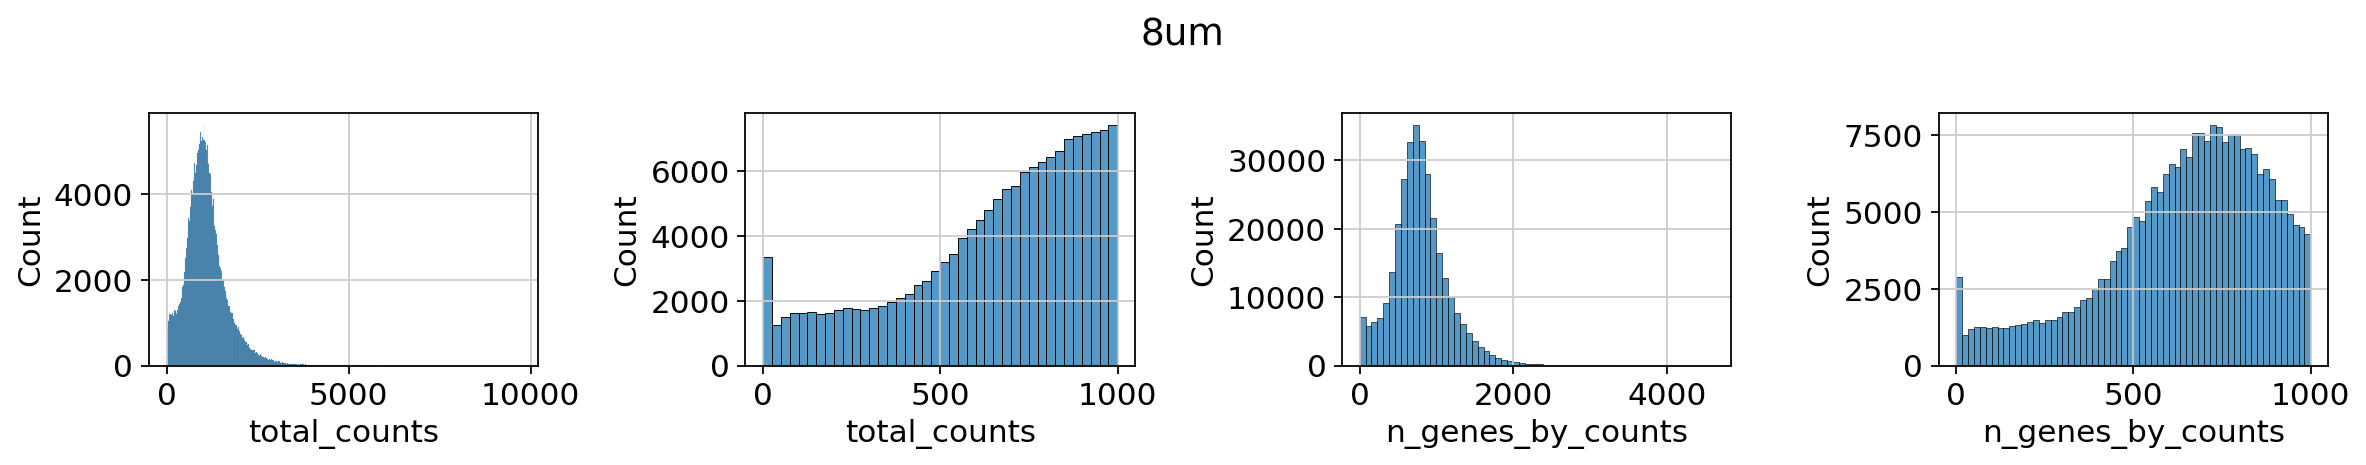

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 1000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 1000],
    kde=False,
    bins=60,
    ax=axs[3],
)
fig.suptitle('8um')
fig.tight_layout()

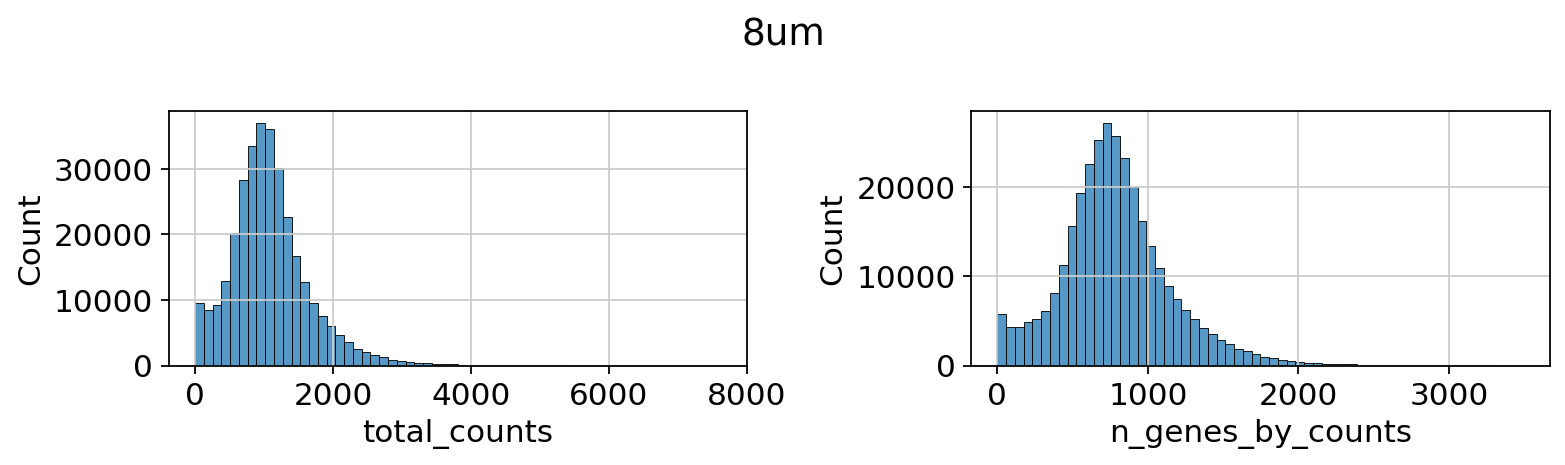

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 8000],
    kde=False,
    bins=60,
    ax=axs[0],
)
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 3500],
    kde=False,
    bins=60,
    ax=axs[1],
)
fig.suptitle('8um')
fig.tight_layout()

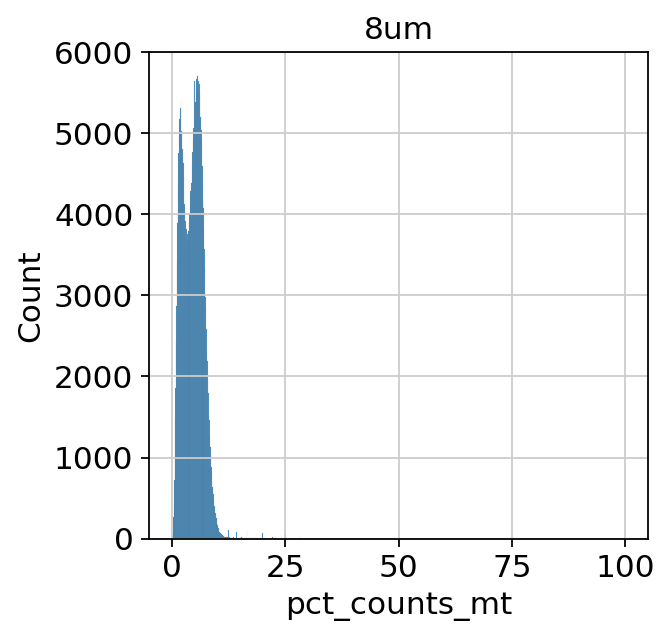

In [16]:
# mito
sns.histplot(adata.obs['pct_counts_mt'], kde=False)
plt.title('8um')
plt.show()

# Filtering

In [17]:
# filtering out poor quality cells/bins
sc.pp.filter_cells(adata, min_genes=100)
print(f'shape of 8um: {adata.shape}')

shape of 8um: (311232, 18085)


# Save

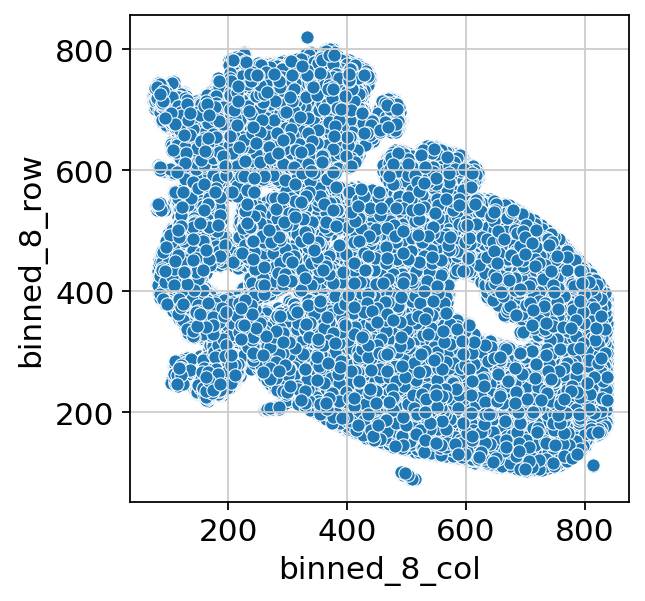

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes,binned_8_row,binned_8_col
s_008um_00301_00321-1,955,6.862758,1215.0,7.103322,19.917695,28.148148,37.860082,62.551440,28.0,3.367296,2.304527,955,301,321
s_008um_00602_00290-1,1220,7.107425,1644.0,7.405496,19.099757,25.912409,37.956204,56.204380,34.0,3.555348,2.068127,1220,602,290
s_008um_00377_00750-1,718,6.577861,986.0,6.894670,26.774848,36.916836,47.464503,77.890467,66.0,4.204693,6.693712,718,377,750
s_008um_00383_00696-1,616,6.424869,780.0,6.660575,25.512821,33.846154,46.666667,85.128205,44.0,3.806663,5.641026,616,383,696
s_008um_00526_00291-1,864,6.762730,1177.0,7.071573,22.939677,31.435854,43.585387,69.073917,19.0,2.995732,1.614274,864,526,291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_008um_00653_00166-1,402,5.998937,478.0,6.171700,26.359833,36.820084,57.740586,100.000000,17.0,2.890372,3.556485,402,653,166
s_008um_00353_00477-1,1155,7.052721,1667.0,7.419381,25.074985,31.913617,42.711458,60.707858,133.0,4.897840,7.978405,1155,353,477
s_008um_00565_00244-1,743,6.612041,852.0,6.748760,17.018779,24.530516,36.267606,71.478873,4.0,1.609438,0.469484,743,565,244
s_008um_00373_00222-1,1138,7.037906,1741.0,7.462789,28.546812,35.152211,46.122918,63.354394,98.0,4.595120,5.628949,1138,373,222


In [18]:
# prepare coordinates
adata.obs['binned_8_row'] = [int(x.split('_')[2]) for x in adata.obs_names]
adata.obs['binned_8_col'] = [int(x.split('_')[3].replace('-1','')) for x in adata.obs_names]
sns.scatterplot(x='binned_8_col',y='binned_8_row',data=adata.obs)
plt.show()
adata.obs

In [19]:
adata.write(f'/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/VisiumHD/{sample_id}_8um-bins_filtered.h5ad')

In [20]:
print(f'/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/VisiumHD/{sample_id}_8um-bins_filtered.h5ad')

/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/VisiumHD/HEA_FOET14880396_8um-bins_filtered.h5ad
